# É possível dobrar o seu dinheiro na bolsa de valores em 3 anos? | O método Monte Carlo

- Criado durante a segunda guerra mundial.
- Nomeado em homenagem a cidade de mônaco com seus cassinos.
- Foi criada originalmente para testar cenários do jogo de paciência.
- Usada para estimar os possíveis resultados de um evento incerto. O acaso é principal elemento da abordagem na modelagem.

----

## Questão a ser respondida:

Em quanto tempo você demoraria pra dobrar seu investimento investindo no ibovespa, o principal índice de ações do Brasil?
Esse investimento vai permitir que você dobre o seu dinheiro com qual probabilidade?

- Tempo mínimo.
- Janela móvel de probabilidade x tempo decorrido em ações.

In [26]:
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
from numpy import linalg as LA
import pandas as pd
import mplcyberpunk

plt.style.use("cyberpunk")

In [27]:
#pegando dados

data_final = dt.datetime.now()
data_inicial = data_final - dt.timedelta(days=10000)

precos = yf.download('^BVSP', data_inicial, data_final)['Adj Close']

precos

[*********************100%***********************]  1 of 1 completed


In [28]:
retornos = precos.pct_change()
retornos

In [29]:
simulacoes = 10000
dias_projetados = 756

valores_carteira = np.zeros([dias_projetados, simulacoes])

for i in range(simulacoes):

    valor_simulado = np.random.choice(retornos, size = dias_projetados, replace = True)
    valor_final = 1000*(1 + valor_simulado).cumprod()
    
    
    valores_carteira[:, i] = valor_final

# Simulações

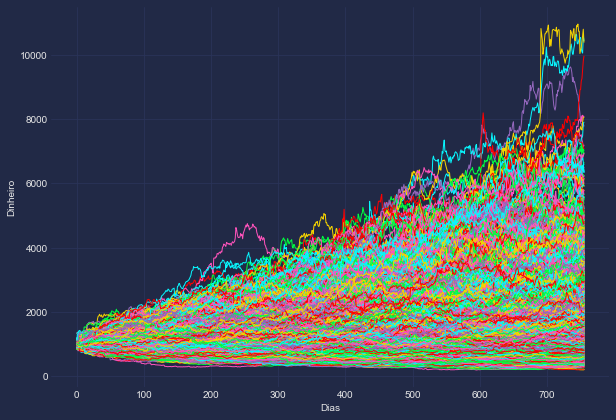

In [30]:
plt.figure(figsize = ((10, 7)))
plt.plot(valores_carteira, linewidth=1)
plt.ylabel('Dinheiro')
plt.xlabel('Dias')
plt.show()

In [ ]:
dobrou_o_dinheiro = valores_carteira > 2000
dobrou_o_dinheiro = pd.DataFrame(dobrou_o_dinheiro)
amostra_que_dobrou = dobrou_o_dinheiro.sum(axis = 1)/simulacoes
amostra_que_nao_dobrou = 1 - amostra_que_dobrou

# % da amostra que dobrou ao longo dos 3 anos.

In [ ]:
plt.figure(figsize = ((10, 7)))
plt.plot(amostra_que_dobrou, linewidth=1)
plt.plot(amostra_que_nao_dobrou)
plt.ylabel('% que dobrou')
plt.xlabel('Dias')
plt.show()

In [ ]:
valores_carteira = pd.DataFrame(valores_carteira)

menor_tempo = valores_carteira[valores_carteira.max(axis = 1) > 2000]
menor_tempo

# Material

* Código na descrição.
* Mude o ativo e o período você mesmo.
* Método de Monte Carlo pra uma carteira de ações em outro vídeo do canal.